In [1]:
# imports
import numpy as np
import os
import tqdm
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from utils.dataset import SeparationDataset
from utils.transforms import STFT

In [2]:
# init dataset
HOME = os.path.expanduser("~")
TEST = os.path.join(HOME, "storage", "separation", "pt_test")
TRAIN = os.path.join(HOME, "storage", "separation", "pt_train")
train_ds = SeparationDataset(TRAIN)
test_ds = SeparationDataset(TEST)
print(f"Training set contains {len(train_ds)} samples.")
print(f"Testing set contains {len(test_ds)} samples.")

Training set contains 100 samples.
Testing set contains 50 samples.


Text(0, 0.5, 'Vocals')

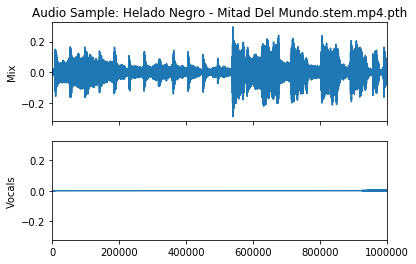

In [3]:
# sample viewer
nsamples = int(1e6)
idx = 10
sample = train_ds[idx]
x = sample["mix"]
y = sample["vocals"]

f, subplot = plt.subplots(2, sharex=True, sharey=True)

subplot[0].set_title("Audio Sample: {}".format(train_ds.filenames[idx]))
subplot[0].set_xlim(0, nsamples)
subplot[0].plot(range(nsamples), np.transpose(x.numpy()[:, 0:nsamples, 0]))
subplot[0].set_ylabel("Mix")
subplot[1].plot(range(nsamples), np.transpose(y.numpy()[:, 0:nsamples, 0]))
subplot[1].set_ylabel("Vocals")


In [33]:
# testing stft
stft = STFT()

# grab a random sample 
sample = train_ds[0]

magnitude, phase = stft.transform(sample['mix'][:,0:1023,0]);

print(f"{sample['mix'].shape}, {magnitude.shape}, {phase.shape}")


torch.Size([1, 8624128, 2]), torch.Size([1, 513, 4]), torch.Size([1, 513, 4])


Text(0, 0.5, 'STFT Mix (Phase)')

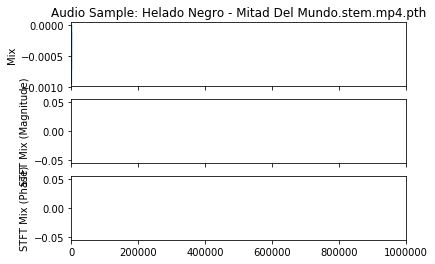

In [35]:
f, subplot = plt.subplots(3, sharex=True)

subplot[0].set_title("Audio Sample: {}".format(train_ds.filenames[idx]))
subplot[0].set_xlim(0, nsamples)
subplot[0].plot(range(513), np.transpose(sample['mix'].numpy()[:,0:513,0]))
subplot[0].set_ylabel("Mix")
subplot[1].plot(range(513), np.transpose(magnitude.numpy()[:,:,0]))
subplot[1].set_ylabel("STFT Mix (Magnitude)")
subplot[2].plot(range(513), np.transpose(phase.numpy()[:,:,0]))
subplot[2].set_ylabel("STFT Mix (Phase)")



In [ ]:
# configuration

dtype = torch.float

device = torch.device("cpu") # Uncomment this to run on CPU
# device = torch.device("cuda:0") # Uncomment this to run on GPU




# XXX can probably pass num_workers=4
# we also need to use a batch size of 1 since we have a dimension mismatch 
# (i.e. there's a different amount of samples depending on the song)
# TODO we should look into transformations
dataloader = DataLoader(train_ds, batch_size=1, shuffle=True)
testloader = DataLoader(test_ds, batch_size=1, shuffle=True)

In [ ]:
# hyperparams




In [5]:
# main training loop
for i, sample in enumerate(dataloader):
    # do something here. For now we'll just print the sample
    print(i, sample['mix'].size(), sample['vocals'].size())

0 torch.Size([1, 1, 11353088, 2]) torch.Size([1, 1, 11353088, 2])
1 torch.Size([1, 1, 1523712, 2]) torch.Size([1, 1, 1523712, 2])
2 torch.Size([1, 1, 11659264, 2]) torch.Size([1, 1, 11659264, 2])
3 torch.Size([1, 1, 9014272, 2]) torch.Size([1, 1, 9014272, 2])
4 torch.Size([1, 1, 8011776, 2]) torch.Size([1, 1, 8011776, 2])
5 torch.Size([1, 1, 9739264, 2]) torch.Size([1, 1, 9739264, 2])
6 torch.Size([1, 1, 10175488, 2]) torch.Size([1, 1, 10175488, 2])
7 torch.Size([1, 1, 8914944, 2]) torch.Size([1, 1, 8914944, 2])
8 torch.Size([1, 1, 761856, 2]) torch.Size([1, 1, 761856, 2])
9 torch.Size([1, 1, 10935296, 2]) torch.Size([1, 1, 10935296, 2])
10 torch.Size([1, 1, 10536960, 2]) torch.Size([1, 1, 10536960, 2])
11 torch.Size([1, 1, 10438656, 2]) torch.Size([1, 1, 10438656, 2])
12 torch.Size([1, 1, 10222592, 2]) torch.Size([1, 1, 10222592, 2])
13 torch.Size([1, 1, 13972480, 2]) torch.Size([1, 1, 13972480, 2])
14 torch.Size([1, 1, 9300992, 2]) torch.Size([1, 1, 9300992, 2])
15 torch.Size([1, 1, 